# Projet Grande Dimension BRIDA GNADJA KEVINS

Dans ce projet nous nous passons de l'exploration des bases de données et de la description de certains algorithmes, car cela a été fait dans celui de l'apprentissage statistique

Nous désirons comprarer divers algorithmes de réduction de dimension, notemment l'ACP et le NMF \
ces deux algorithmes n'ayant pas les mêmes critères d'évaluation, nous utilisons alors leurs bases de données respectives dans le cadre d'une classification et d'un clustering. \
Pour la classification, les SVM fut retenu et pour le clustering nous utilisons le sepectral clustering \
Il convient de noter aussi que de manière naturelle nous comparons aussi les résultats de ces algorithmes à la situation initiale ( sans réduction de dimension ). Afin, non seulement de les comparer entre eux, mais aussi de voir leurs performences intresectes

In [2]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.decomposition import NMF, PCA
from sklearn.decomposition.nmf import _beta_divergence
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, silhouette_score
from sklearn.cluster import SpectralClustering
from numpy import unique, where

C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.decomposition.nmf module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
os.chdir('D:\SORBONNE\M2\S1\Cours\Apprentissage stat\Projet\DataSet\SELECTED\Mobile Prices Dataset-20210109')
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=';')

In [5]:
# Renommer les variables de la base d'entrainement
train = train.rename(columns = {'battery_power':'PuissanceBatterie','blue':'Bluetooth','clock_speed':'Verou','dual_sim':'DualSim','fc':'CameraFace',
                                'four_g':'4G','int_memory':'Rom','m_dep':'ProfMobile','mobile_wt':'Poids','pc':'CameraArriere',
                                'px_height':'HateurPixel','px_width':'LageurPixel','ram':'Ram','sc_h':'HateurEcran','sc_w':'LargeurEcran',
                                'talk_time':'TempAppel','three_g': '3G','touch_screen':'Tactile','n_cores':'Core','wifi':'WiFi','price_range':'PlagePrix'})

In [30]:
# Renommer les variables de la base de test
test = test.rename(columns = {'id':'ID','battery_power':'PuissanceBatterie','blue':'Bluetooth','clock_speed':'Verou','dual_sim':'DualSim',
                              'fc':'CameraFace','four_g':'4G','int_memory':'Rom','m_dep':'ProfMobile','mobile_wt':'Poids','pc':'CameraArriere',
                              'px_height':'HateurPixel','px_width':'LageurPixel','ram':'Ram','sc_h':'HateurEcran','sc_w':'LargeurEcran',
                              'talk_time':'TempAppel','three_g': '3G','touch_screen':'Tactile','n_cores':'Core','wifi':'WiFi'})

In [6]:
Xf = train.drop("PlagePrix", axis=1)
yf = train['PlagePrix']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size = 0.25, random_state = 0)

# Reduction de dimension 

## NMF (non Négative Matrice Factorisation

l'agorithme NMF reduit la dimension d'une matrice (X) non négatice en trouvant  deux matrices (W, H) non négatives dont le produit donne la matrice de depart. pour ce faire il optimise la fonction objective suivante : \
0.5*||X-WH||^2 + alpha*l1*||vec(W)|| + alpha*l1*||vec(H)|| + 0.5*alpha*(1-l1)*||W||^2 + 0.5*alpha*(1-l1)*||H||^2

Pour resoudre cette fonction, le matrice W et H sont initialisées de diverse manière et pour diverse méthode. Ce sont ces element qui constituent les parametres de l'agorithme NMF

--- n_components : le nombre de composants à rétenir dans l'output de la fonction

--- init : méthode d'initialisation des matrice W et H

    - random : les matrices sont aléatoires et mises à l'échelle comme suit: sqrt (X.mean () / n_components)
    - nndsvd : L' nitialisation des matrice est faite par décomposition en double des valeurs singulièred non négative de la matrice X (mieux  la parcimonie )
    - nndsvda : on applique la méthode  NNDSVD en remplaçant les zéros remplis par la moyenne de X (mieux lorsque la parcimonie n'est pas souhaitée)
    - nndsvdar : on applique la méthode  NNDSVD en remplaçant les zéros remplis par de petites valeurs aléatoires (alternative généralement plus rapide et moins précise à NNDSVDa lorsque la parcimonie n'est pas souhaitée)
    - custom : utilisez les matrices personnalisées W et H
    
--- solveur :
 
    - cd :  est un solveur de descente de coordonnées. 
    - mu :  est un solveur de mise à jour multiplicative.
    
--- beta_loss : c'est la divergence entre X et WH à miniser, ainsi les option de "beta loss" sont l'ensemble des divergence possible à considérer dans l'optisation de la fonction cible

    - frobenius :  Nous considérons une matrice de données synthétique V construite comme V = W∗H où les facteurs de vérité de terrain sont générés comme les valeurs absolues du bruit gaussien.La matrice peut être exactement factorisé de manière à ce que tous les algorithmes convergent vers une solution telle que
    - kullback-leibler : Il s'agit essentiellement d'une fonction de coût paramétrée avec un seul paramètre β, qui prend la valeur euclidienne la distance
    - itakura-saito : est un cas particulier de la divergence kullback-leibler  (β = 2, 1 et 0)

  

Ici on utilise l'erreur de reconstitution pour évaluer le modèl, c'ette erreur est la distance entre la matrice X et la matrice réconstitué WH \
NB : l'erreur de reconstitution baisse en rajoutant des facteur, il faudra faire unu compris en s'arretant avant le plus petit

In [5]:
data = pd.DataFrame()
init = ["random", "nndsvd", "nndsvda", "nndsvdar", "custom"]
beta_loss = ["frobenius", "kullback-leibler", "itakura-saito"]
solver = ["cd", "mu"]
best = np.infty
for i in range(1,len(X.columns)):
    for j in init : 
        for h in beta_loss :
            for k in solver : 
                try : 
                    model = NMF(n_components = i, init = j, beta_loss = h, solver = k, random_state=2)
                    x_new = model.fit(Xf)
                    data.at[i, j+"_"+h+"_"+k] = x_new.reconstruction_err_
                    bes = model.fit(Xf).reconstruction_err_
                except :
                    pass
                if bes < best:
                    best = bes
                    comb = j+"_"+h+"_"+ k
                    nbcomp = i

C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:229: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  UserWarning)
C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:229: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer resu

In [6]:
npdat = np.array(data)

In [8]:
comb

'nndsvd_frobenius_cd'

In [10]:
nbcomp

19

On constate que dans l'absolue c'est la combinaison "nndsvd" , "frobenius" et "cd" respectivement pour les arguments init, beta_loss et soler, qui donne le meilleur résultat( une erreur moindre) \
Concernant le nombre de composant, nous choisissons 5, car a partir de 4 composants l'erreur est déja très petite

NB : Pour une question de visibilité nous avons mis les 12 courbes sur 3 graphes \
    en abscisse nous avons le nombre de clusters et en ordonnée la valeur de l'erreur de construction

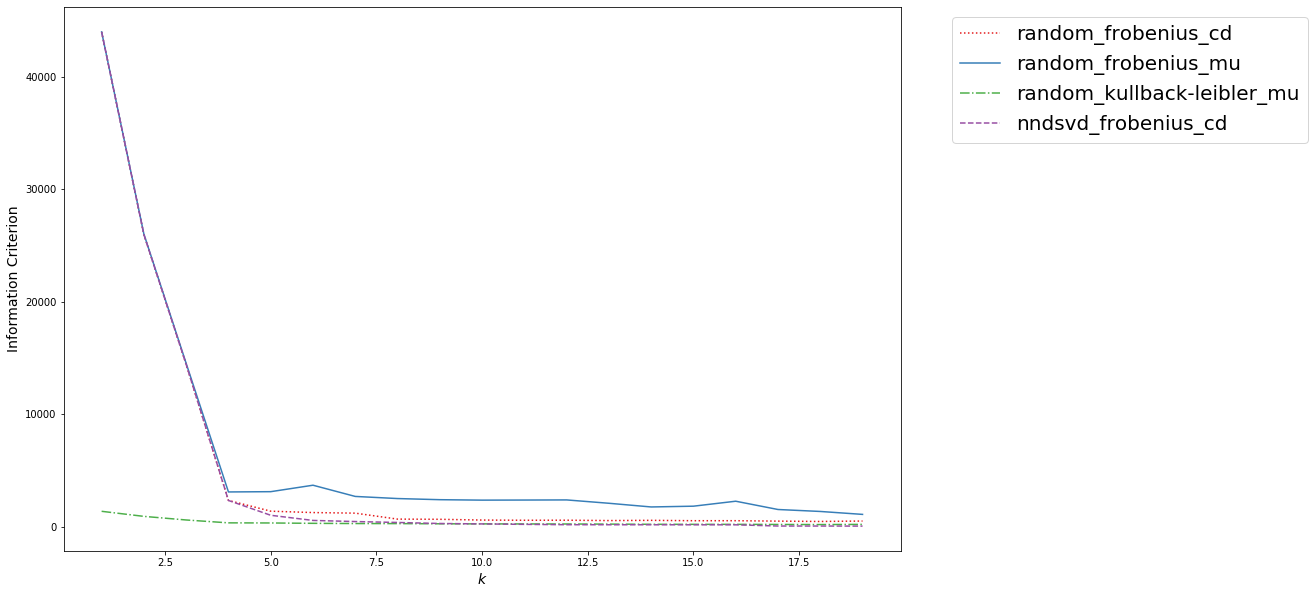

In [64]:
plt.figure(figsize=(15,10))
plt.rcParams["image.cmap"] = "Set1"

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
line = [":","-","-.","--"]
for i in range(4) :
    plt.plot(range(1, 20), npdat[:,i], label=data.columns[i],linestyle=line[i])
plt.xlabel("$Nb cluster$", fontsize=14)
plt.ylabel("Eurreur de rconstitution", fontsize=14)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 20})
plt.show()

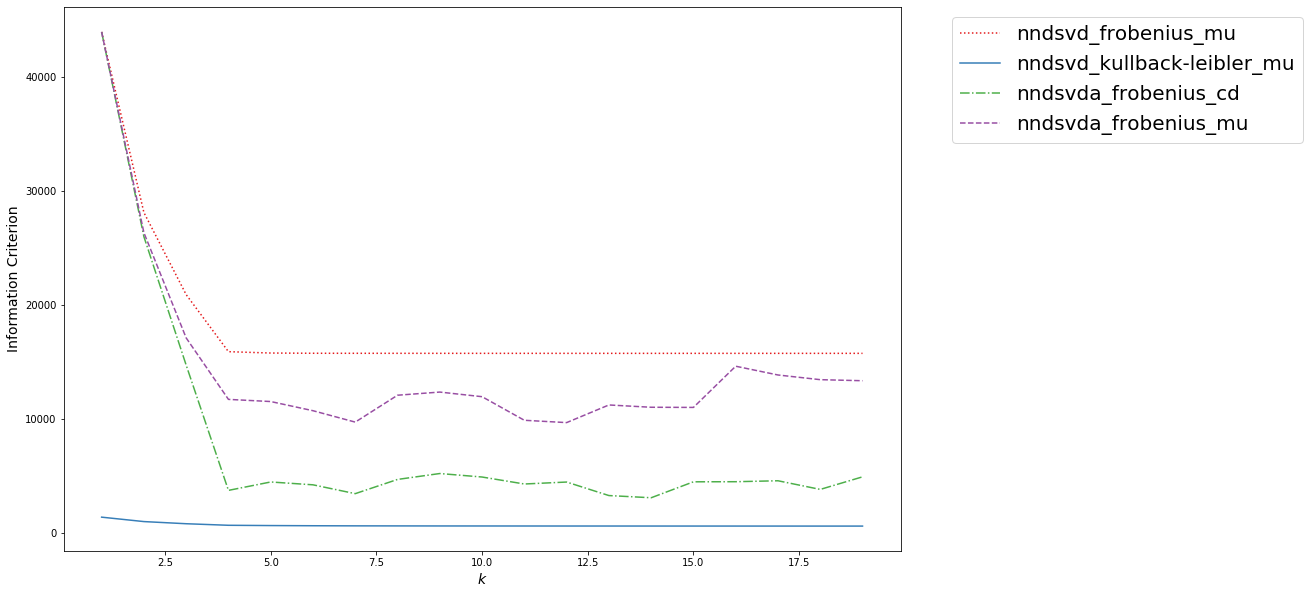

In [65]:
plt.figure(figsize=(15,10))
import matplotlib.pyplot as plt
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
line = [":","-","-.","--"]
for i in range(4) :
    plt.plot(range(1, 20), npdat[:,4+i], label=data.columns[4+i],linestyle=line[i])
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 20})
plt.show()

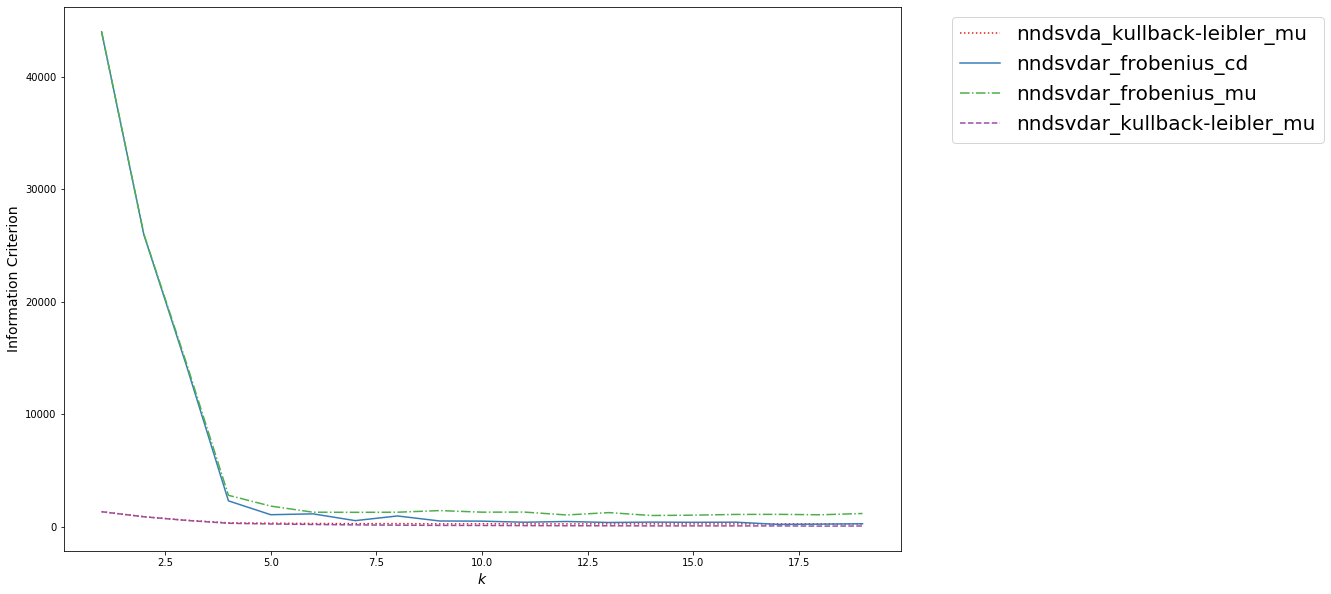

In [66]:
plt.figure(figsize=(15,10))
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
line = [":","-","-.","--"]
for i in range(4) :
    plt.plot(range(1, 20), npdat[:,8+i], label=data.columns[8+i],linestyle=line[i])
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 20})
plt.show()

In [64]:
model = NMF(n_components = 5, init = "nndsvd", beta_loss = "frobenius", solver = "cd", random_state=2)
x_new = model.fit_transform(Xf)

C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Les bases de données test et train pour la NMF

In [65]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x_new, yf, test_size = 0.25, random_state = 0)

## ACP

Nous excutons l'acp en faisant varier plusieurs de ses parametres pour obtenir la variante qui donne le plus haut pourcentage de variance expliquée

In [13]:
var_ratio={}
svd_solver = ["auto", "full", "arpack", "randomized"]
whiten = ["False","True"]
veb = -1000

for i in svd_solver : 
    for j in whiten : 
        pc=PCA(5, svd_solver=i, whiten=j)
        cr_pca=pc.fit(Xf)
        var_ratio[str(i)+"_"+str(j)]=sum(cr_pca.explained_variance_)
        ve = sum(cr_pca.explained_variance_)
        if ve > veb :
            veb = ve
            comb = str(i)+"_"+str(j)

In [8]:
comb

'auto_True'

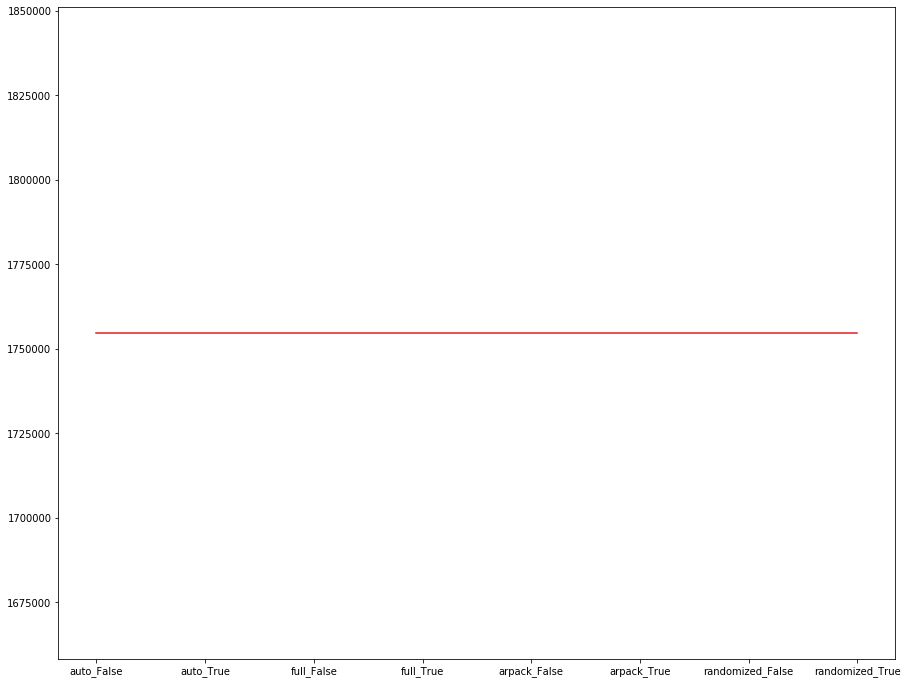

In [14]:
scorr = pd.DataFrame(list(var_ratio.items()),columns=['combi', 'score'])
bars = scorr["combi"]
y_pos = np.arange(len(bars))

fig = plt.figure(1, figsize=(15, 12))
plt.plot(y_pos, scorr['score'])
plt.xticks(y_pos, bars)

plt.show()

Afin de permettre la comparaison, nous décidons de garder le même nombre de composants pour les 2 méthodes

le resultat est le meme quelque soit la variante, nous retenons donc celle qui choisit automatiquement le solver et met à l'échelle les données.

In [9]:
pc=PCA(5, svd_solver="auto", whiten="True")
Cpc = pc.fit(Xf)
X_t = pc.fit_transform(Xf)
X_t.shape

(2000, 5)

Les bases train et test pour l'acp

In [108]:
X_trainp, X_testp, y_trainp, y_testp = train_test_split(X_t, yf, test_size = 0.25, random_state = 0)

# Classification 

## Svm classification

Les avantages des machines vectorielles de support sont:

Efficace dans les espaces de grande dimension.

Toujours efficace dans les cas où le nombre de dimensions est supérieur au nombre d'échantillons.

Utilise un sous-ensemble de points d'apprentissage dans la fonction de décision (appelés vecteurs de support), donc il est également efficace en mémoire.

Polyvalent: différentes fonctions du noyau peuvent être spécifiées pour la fonction de décision. Des noyaux communs sont fournis, mais il est également possible de spécifier des noyaux personnalisés.

Il doit s'agir de «linear», «poly», «rbf», «sigmoid», «precalculé» ou appelable. Si aucun n'est indiqué, «rbf» sera utilisé. Si un appelable est donné, il est utilisé pour précalculer la matrice du noyau à partir des matrices de données; cette matrice doit être un tableau de formes .(n, n)

--- gamma  Coefficient de noyau pour «rbf», «poly» et «sigmoïde».

    -  scale :  il utilise 1 / (n_features * X.var ()) comme valeur de gamma,

    - auto utilise 1 / n_features.
    
--- class_weight :  toutes les classes sont censées avoir un poids


     - balanced : utilise les valeurs de y pour ajuster automatiquement les poids inversement proportionnels aux fréquences de classe dans les données d'entrée

## Sur données de nmf

In [66]:
noyau  = ["linear", "poly", "rbf", "sigmoid", "precomputed"]
gamma  = ["scale", "auto"]
poid = ["dict", "balanced", None]
scor = {}
for i in noyau :
    for j in gamma :
        for h in poid :
            try :
                clf =  SVC(kernel =i , gamma = j, class_weight = h) 
                cv_scores = cross_val_score(clf, X_trainf, y_trainf, cv=5, scoring='accuracy')
                agr = str(h)+"_"+ str(i) +"_"+ str(j)
                scor[agr] = cv_scores.mean()
            except :
                pass

C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 547, in _validate_targets
    classes=cls, y=y_)
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 64, in compute_class_weight
    " got: %r" % class_weight)
ValueError: class_weight must be dict, 'balanced', or 

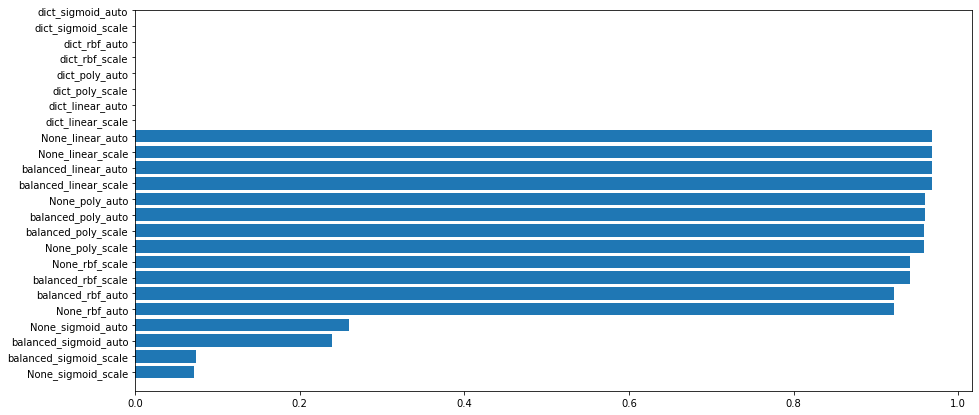

In [67]:
scordTr = pd.DataFrame(list(scor.items()),columns=['combi', 'score'])
scordTr = scordTr.sort_values(by = 'score')
sdt = scordTr[scordTr["score"]==scordTr["score"].max()]
#x = np.arange(len(scorTr["combi"]))
bars = scordTr["combi"]
y_pos = np.arange(len(bars))

fig = plt.figure(1, figsize=(15, 7))
plt.barh(y_pos, scordTr['score'])
plt.yticks(y_pos, bars)

plt.show()

Le noyau linéaire avec le coefficient auto et le poids balanced donnent l'accuracy la plus haute

In [68]:
bclf = SVC(kernel ="linear" , gamma = "auto", class_weight = None) .fit(X_trainf,y_trainf)
pred = bclf.predict(X_testf)
print(classification_report(y_testf,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.95      0.97      0.96       110
           2       0.96      0.96      0.96       125
           3       0.99      0.97      0.98       141

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



### Sur données globales

In [60]:
noyau  = ["linear", "poly", "rbf", "sigmoid", "precomputed"]
gamma  = ["scale", "auto"]
poid = ["dict", "balanced", None]
scorg = {}
for i in noyau :
    for j in gamma :
        for h in poid :
            try :
                clf =  SVC(kernel =i , gamma = j, class_weight = h) 
                cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
                agr = str(h)+"_"+ str(i) +"_"+ str(j)
                scorg[agr] = cv_scores.mean()
            except :
                pass

C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 547, in _validate_targets
    classes=cls, y=y_)
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 64, in compute_class_weight
    " got: %r" % class_weight)
ValueError: class_weight must be dict, 'balanced', or 

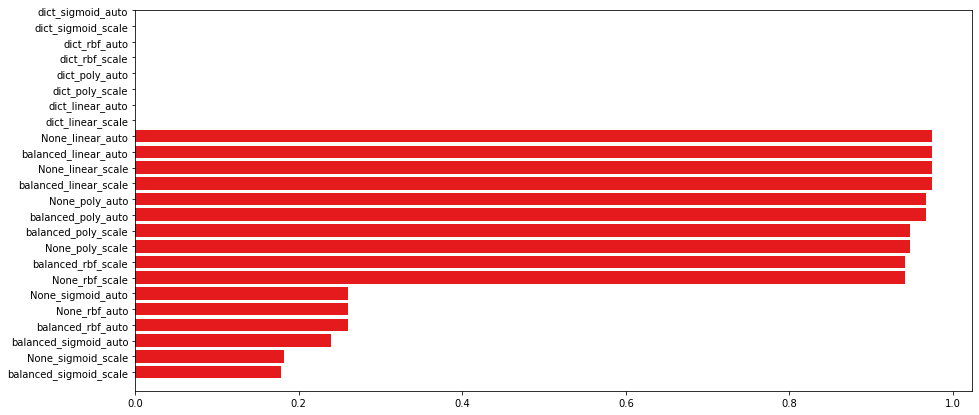

In [80]:
scordTr = pd.DataFrame(list(scorg.items()),columns=['combi', 'score'])
scordTr = scordTr.sort_values(by = 'score')
sdt = scordTr[scordTr["score"]==scordTr["score"].max()]
#x = np.arange(len(scorTr["combi"]))
bars = scordTr["combi"]
y_pos = np.arange(len(bars))

fig = plt.figure(1, figsize=(15, 7))
plt.barh(y_pos, scordTr['score'])
plt.yticks(y_pos, bars)

plt.show()

In [63]:
bclf = SVC(kernel ="linear" , gamma = "auto", class_weight = None) .fit(X_train,y_train)
pred = bclf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       124
           1       0.97      0.97      0.97       110
           2       0.95      0.98      0.96       125
           3       0.99      0.97      0.98       141

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



## Sur données ACP

In [110]:
noyau  = ["linear", "poly", "rbf", "sigmoid", "precomputed"]
gamma  = ["scale", "auto"]
poid = ["dict", "balanced", None]
scorp = {}
for i in noyau :
    for j in gamma :
        for h in poid :
            try :
                clf =  SVC(kernel =i , gamma = j, class_weight = h) 
                cv_scores = cross_val_score(clf, X_trainp, y_trainp, cv=5, scoring='accuracy')
                agr = str(h)+"_"+ str(i) +"_"+ str(j)
                scorp[agr] = cv_scores.mean()
            except :
                pass

C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 164, in fit
    y = self._validate_targets(y)
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 547, in _validate_targets
    classes=cls, y=y_)
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\utils\class_weight.py", line 64, in compute_class_weight
    " got: %r" % class_weight)
ValueError: class_weight must be dict, 'balanced', or 

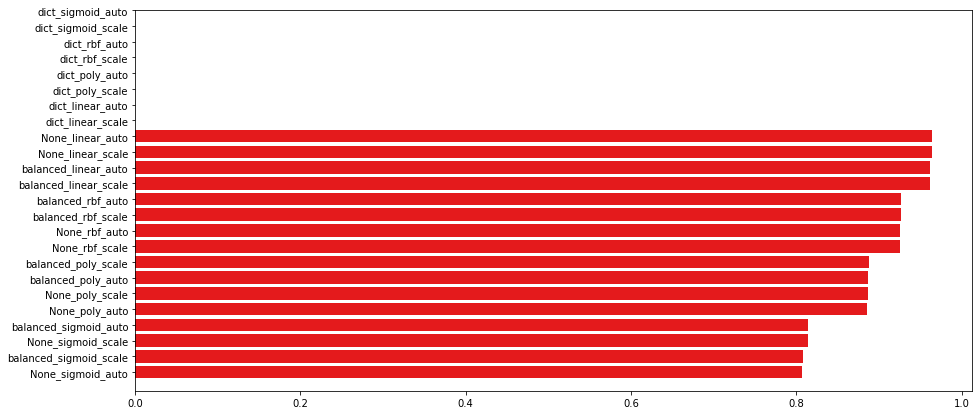

In [111]:
scordTr = pd.DataFrame(list(scorp.items()),columns=['combi', 'score'])
scordTr = scordTr.sort_values(by = 'score')
sdt = scordTr[scordTr["score"]==scordTr["score"].max()]
#x = np.arange(len(scorTr["combi"]))
bars = scordTr["combi"]
y_pos = np.arange(len(bars))

fig = plt.figure(1, figsize=(15, 7))
plt.barh(y_pos, scordTr['score'])
plt.yticks(y_pos, bars)

plt.show()

In [112]:
bclf = SVC(kernel ="linear" , gamma = "auto", class_weight = None) .fit(X_trainp,y_trainp)
pred = bclf.predict(X_testp)
print(classification_report(y_testp,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.95      0.97      0.96       110
           2       0.99      0.96      0.98       125
           3       0.99      0.99      0.99       141

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



On remaque que quelque soit la base de données, les parametre "auto", "linear" et "None" respectivement pour le noyau, le gamma et le poids des classe donne une meilleur resultats pour la classification (SVM SVC).
IL convient de noter que les données issues de l'acp donnent le meilleur résultat que les données initiales et celles du NMF donne un résultat légèrement en dessous. 

Nous pouvons donc conclure que l'acp comme le NMF garde la quasi totalité de l'information en passant de 20 à 5 variable. \
Cependant l'acp reste légèrement meilleur devant le NMF

## Spectral clustering

Pour un soucis de ressouce machine, nous limitons le nombre de clusters à 5 au maximum et nous éléminons aussi certains parametres des pour le solver et l'affinité

Le critère de selection est la silhouette score

## Clustrering sur données NMF

In [121]:
datas = pd.DataFrame()
solver = ["arpack", "lobpcg"]
affinity = ["nearest_neighbors","rbf"]
scorrF = -10
for x in range(2,6) :
    for i in solver :
        for j in affinity:
            spectral_model_rbf = SpectralClustering(n_clusters =x , eigen_solver=i, affinity=j, assign_labels="discretize",  random_state=0) 
            labels = spectral_model_rbf.fit_predict(x_new) 
            score = silhouette_score(x_new, labels)  
            datas.at[x,str(i) +"_"+ str(j)] =  score
            if scorrF < score:
                scorrF = score
                nb_cl = x
                comb = str(i) +"_"+ str(j)
                yhf = labels

In [122]:
nb_cl

2

In [123]:
comb

'arpack_nearest_neighbors'

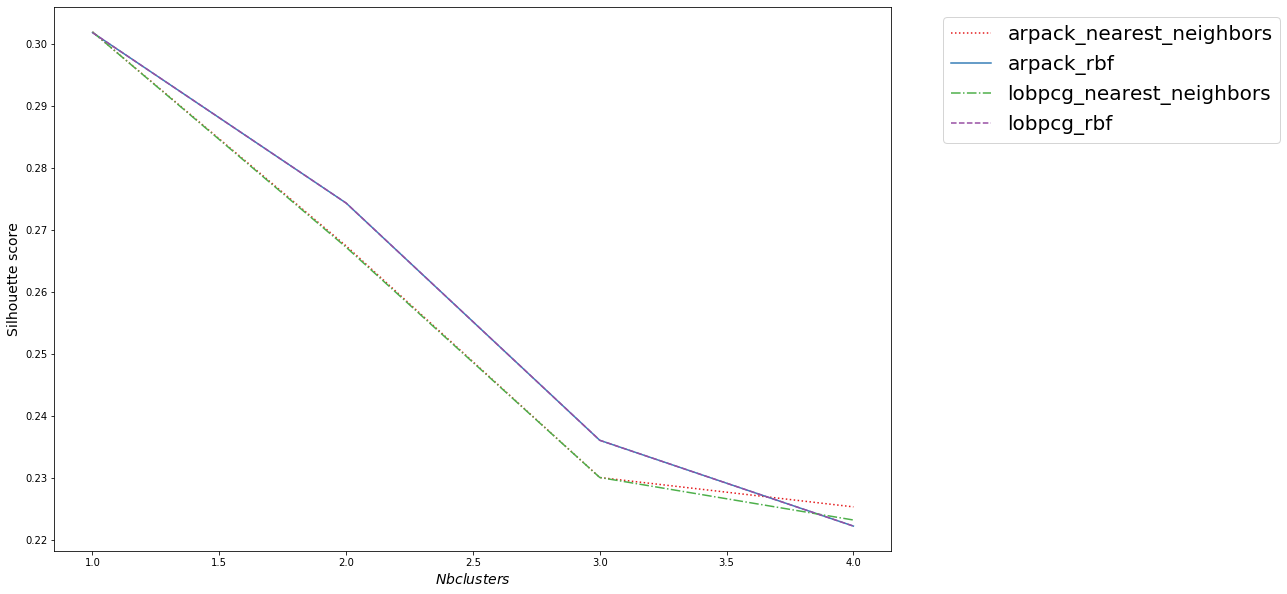

In [124]:
npdat  = np.array(datas)
plt.figure(figsize=(15,10))
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
line = [":","-","-.","--"]
for i in range(4) :
    plt.plot(range(1, 5), npdat[:,i], label=datas.columns[i],linestyle=line[i])
plt.xlabel("$Nb clusters$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 20})
plt.show()

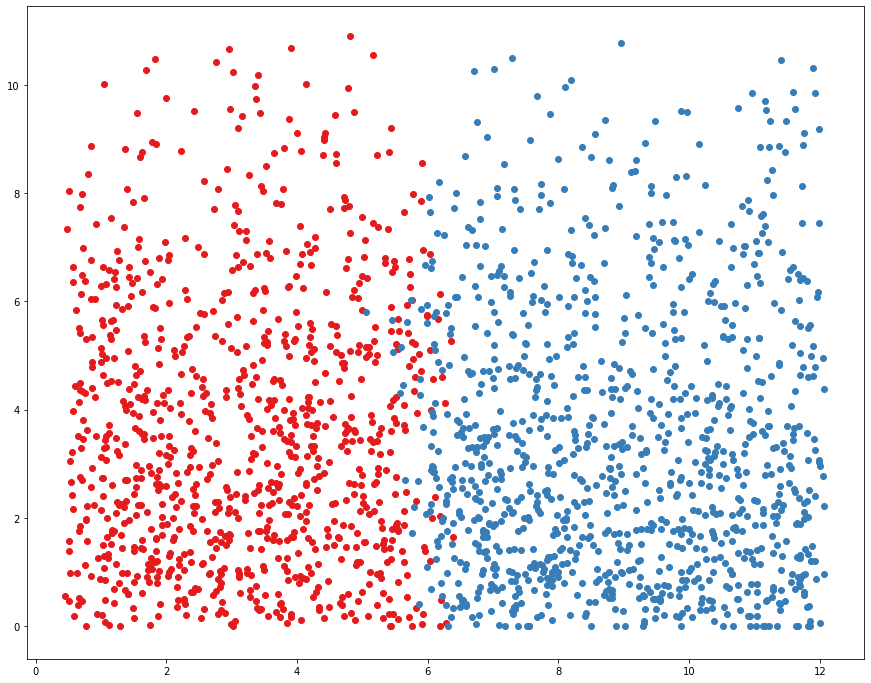

In [128]:
clusters = unique(yhf)
fig = plt.figure(1, figsize=(15, 12))
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhf == cluster)
	# create scatter of these samples
	plt.scatter(x_new[row_ix, 0], x_new[row_ix, 1])
# show the plot
plt.show()

## Clustrering sur données Globales

In [129]:
datag = pd.DataFrame()
solver = ["arpack", "lobpcg"]
affinity = ["nearest_neighbors","rbf"]
scorrF = -10
for x in range(2,6) :
    for i in solver :
        for j in affinity:
            spectral_model_rbf = SpectralClustering(n_clusters =x , eigen_solver=i, affinity=j, assign_labels="discretize",  random_state=0) 
            labels = spectral_model_rbf.fit_predict(Xf) 
            score = silhouette_score(Xf, labels)  
            datag.at[x,str(i) +"_"+ str(j)] =  score
            if scorrF < score:
                scorrF = score
                nb_cl = x
                comb = str(i) +"_"+ str(j)
                yhg = labels

C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\gasto\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\gasto\Anaconda3\lib

In [130]:
nb_cl

2

In [131]:
comb

'arpack_nearest_neighbors'

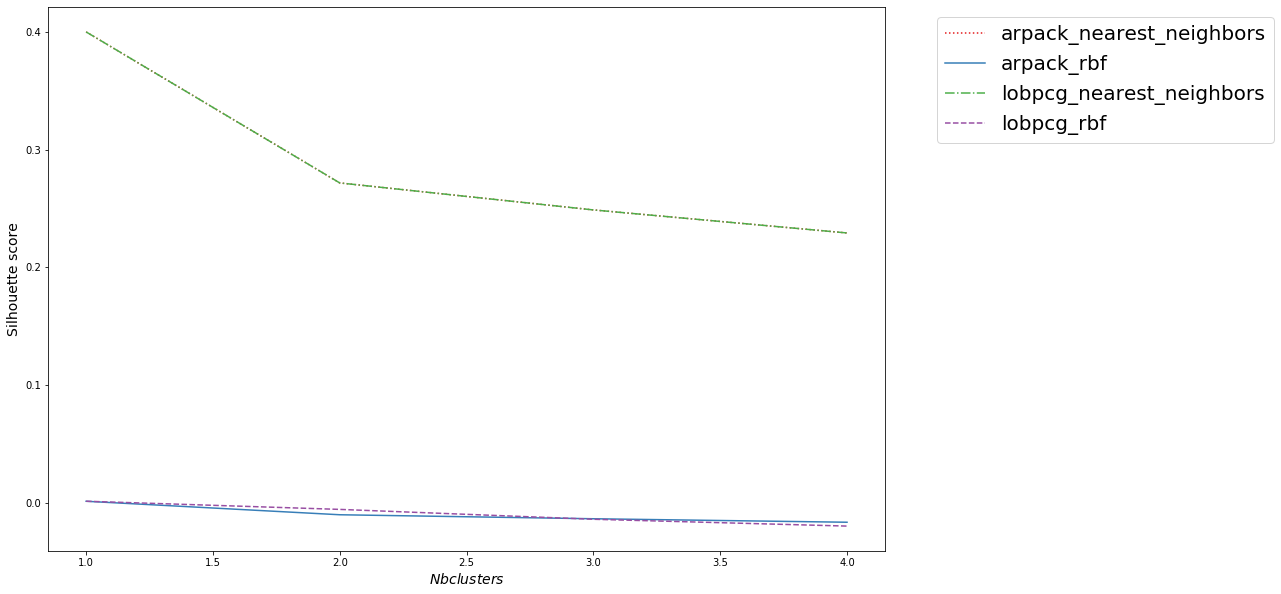

In [132]:
npdat  = np.array(datag)
plt.figure(figsize=(15,10))
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
line = [":","-","-.","--"]
for i in range(4) :
    plt.plot(range(1, 5), npdat[:,i], label=datag.columns[i],linestyle=line[i])
plt.xlabel("$Nb clusters$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 20})
plt.show()

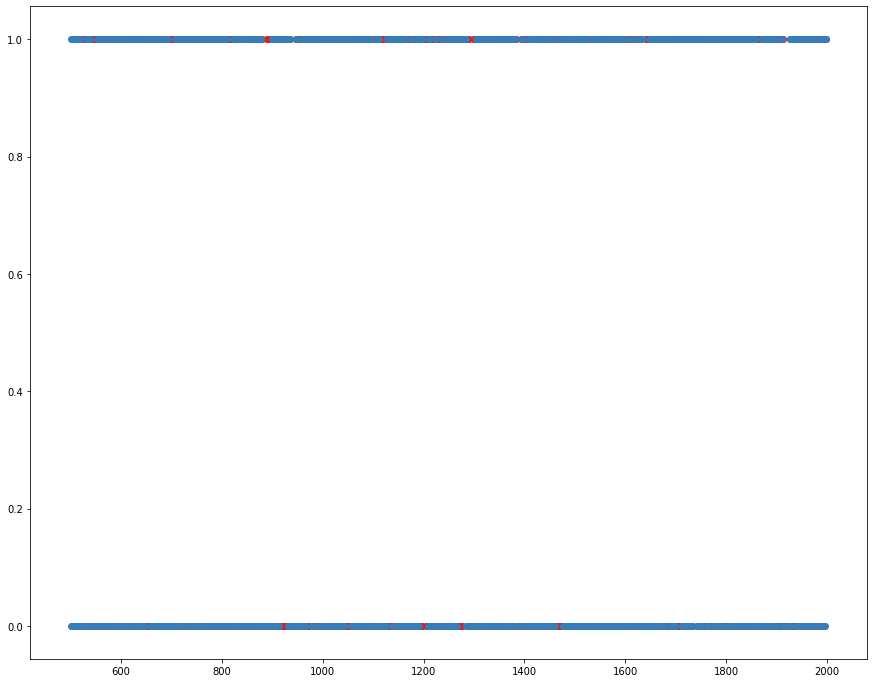

In [139]:
clusters = unique(yhg)
Xft = np.array(Xf)
fig = plt.figure(1, figsize=(15, 12))
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhg == cluster)
	# create scatter of these samples
	plt.scatter(Xft[row_ix, 0], Xft[row_ix, 1])
# show the plot
plt.show()

## Clustrering sur données Globales ACP

In [134]:
datag = pd.DataFrame()
solver = ["arpack", "lobpcg"]
affinity = ["nearest_neighbors","rbf"]
scorrF = -10
for x in range(2,6) :
    for i in solver :
        for j in affinity:
            spectral_model_rbf = SpectralClustering(n_clusters =x , eigen_solver=i, affinity=j, assign_labels="discretize",  random_state=0) 
            labels = spectral_model_rbf.fit_predict(X_t) 
            score = silhouette_score(X_t, labels)  
            datag.at[x,str(i) +"_"+ str(j)] =  score
            if scorrF < score:
                scorrF = score
                nb_cl = x
                comb = str(i) +"_"+ str(j)
                yhp = labels

In [135]:
nb_cl

3

In [136]:
comb

'lobpcg_rbf'

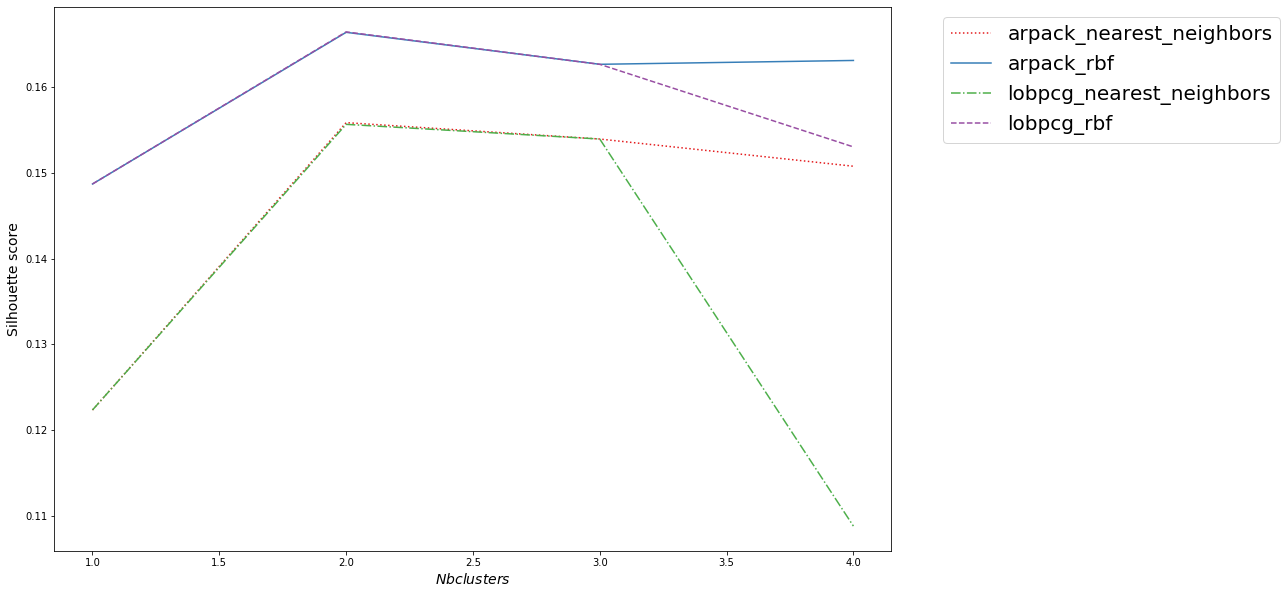

In [137]:
npdat  = np.array(datag)
plt.figure(figsize=(15,10))
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
line = [":","-","-.","--"]
for i in range(4) :
    plt.plot(range(1, 5), npdat[:,i], label=datag.columns[i],linestyle=line[i])
plt.xlabel("$Nb clusters$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 20})
plt.show()

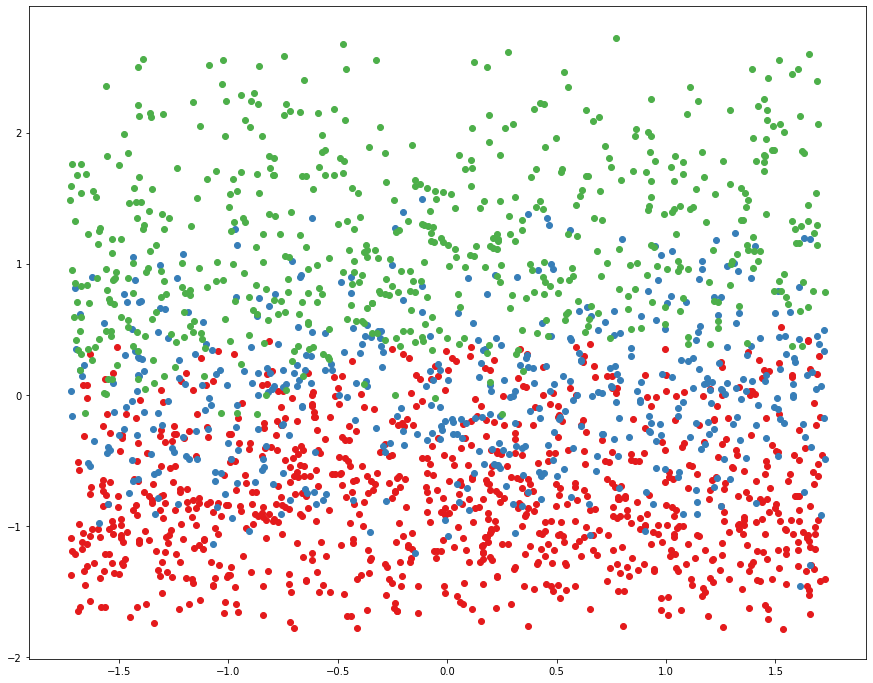

In [138]:
clusters = unique(yhp)
fig = plt.figure(1, figsize=(15, 12))
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhp == cluster)
	# create scatter of these samples
	plt.scatter(X_t[row_ix, 0], X_t[row_ix, 1])
# show the plot
plt.show()

La clusterisation sur les données initiales et sur celle du NMF préconise 2 clusteur, tant dis que celle avec l'acp donne 3 cluster.
Visiblement nous constatons que le meilleur clustering se fait avec le NMF

## Conclusion générale

Au terme de notre étude nous pouvons dire que l'acp et le NMF sont de bon algorithme de reduction de dimension. Cependant nous pouvons préconiser l'acp pour une réduction de dimension à des fins de classification et le NMF pour un clustering